In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train/_classes.csv')
valid_df = pd.read_csv('valid/_classes.csv')
test_df = pd.read_csv('test/_classes.csv')

print(train_df.shape, valid_df.shape, test_df.shape)

(128, 5) (25, 5) (36, 5)


In [3]:
train_df.head()

,filename,Dry_joint,Incorrect_installation,PCB_damage,Short_circuit
0,WIN_20221102_19_19_13_Pro_jpg.rf.00edadb17d965...,0,1,0,0
1,WIN_20221023_15_31_50_Pro_jpg.rf.143ce80153faf...,0,1,0,0
2,WIN_20221102_20_12_07_Pro_jpg.rf.15d870598ebd9...,0,1,0,0
3,WIN_20221030_19_48_24_Pro_jpg.rf.02ed783cbbbf7...,0,1,0,0
4,WIN_20221030_19_13_58_Pro_jpg.rf.124282de12f7b...,0,0,0,0


In [4]:
def get_stats(df):
    col_counts = {}
    for col in df.columns[1:]:
        col_count = df[df[col] == 1].shape[0]
        print(f"{col} : {col_count}")
        col_counts[col] = col_count

    df['RowSum'] = df.drop('filename', axis=1).sum(axis=1)
    
    zero_count = df[(df.drop('filename', axis=1) == 0).all(axis=1)].shape[0]
    single_count = df[df['RowSum'] == 1].shape[0]
    multi_count = df[df['RowSum'] > 1].shape[0]
    print(f" Empty Count : {zero_count}")
    print(f" Single Count : {single_count}")
    print(f" Multiple Count : {multi_count}")
    
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))

    ax1.bar(list(col_counts.keys()), list(col_counts.values()))
    ax2.bar(['Empty', 'Single Class', 'Multi Class'], [zero_count, single_count, multi_count])

    plt.show()

 Dry_joint : 11
 Incorrect_installation : 76
 PCB_damage : 6
 Short_circuit : 31
 Empty Count : 20
 Single Count : 93
 Multiple Count : 15


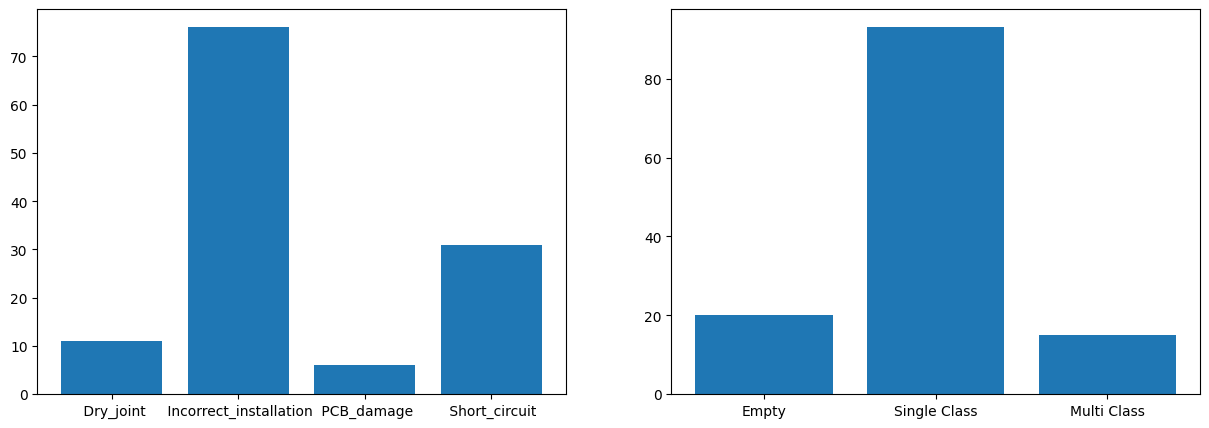

In [5]:
get_stats(train_df)

 Dry_joint : 1
 Incorrect_installation : 11
 PCB_damage : 0
 Short_circuit : 13
 Empty Count : 5
 Single Count : 15
 Multiple Count : 5


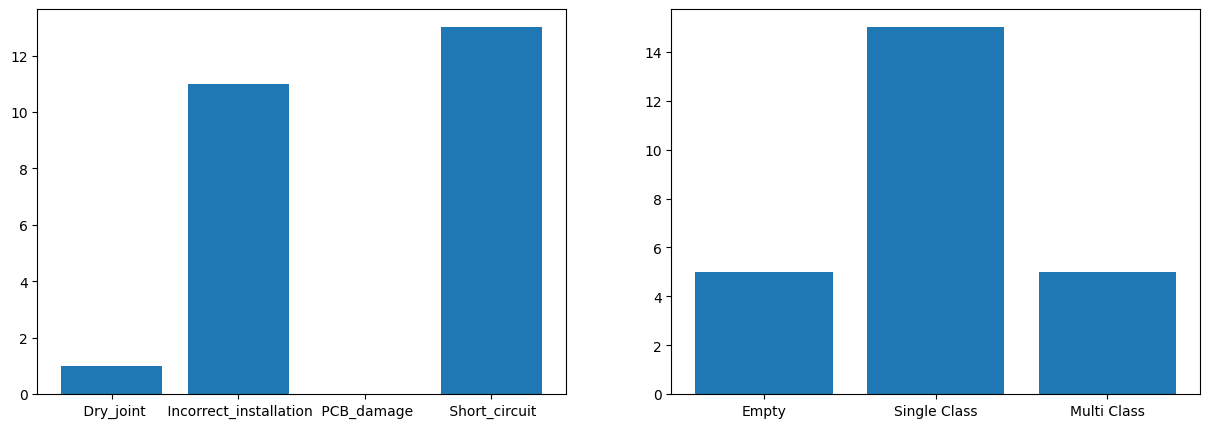

In [6]:
get_stats(valid_df)

 Dry_joint : 10
 Incorrect_installation : 10
 PCB_damage : 1
 Short_circuit : 9
 Empty Count : 9
 Single Count : 24
 Multiple Count : 3


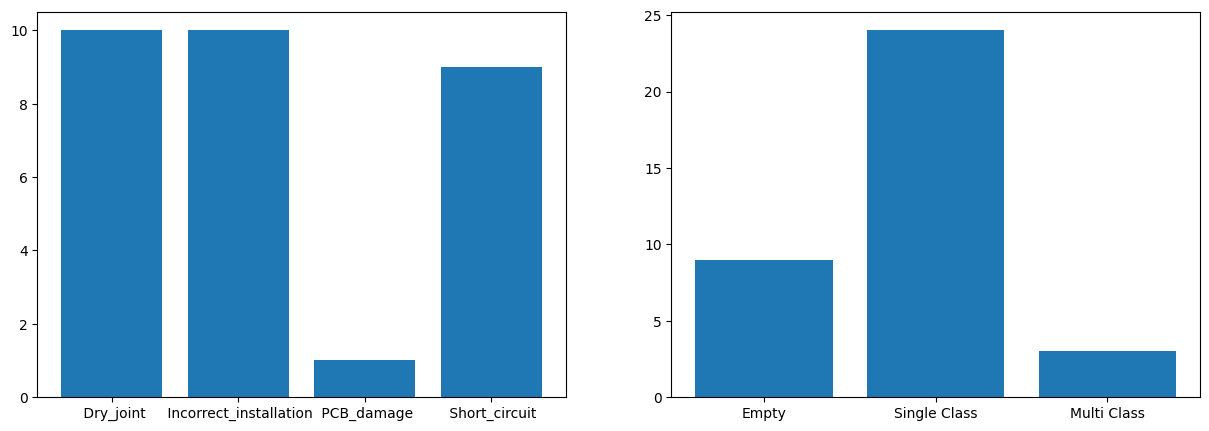

In [7]:
get_stats(test_df)